# Author: FANDI ZINEB
## CodeAlpha_Project_MachineLearning_Internship_TASK4:
Disease Prediction from Medical Data
<br>
Create a model to predict the likelihood of a disease based on medical data (e.g., symptoms, patient interactivity.
history). Use datasets with labeled medical records and apply classification algorithms.


### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

### Reading data

In [2]:
df = pd.read_csv('C:\\Users\\user\\Downloads\\heart.csv',low_memory=False)

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


 #### Shape of the data

In [6]:
df.shape

(918, 12)

In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

 #### Get data type information

In [8]:
df.dtypes                     

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

#### Check null values

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### Check duplicated data

In [10]:
df.duplicated().sum() > 0

False

In [11]:
# Variables non catégorielles
non_categorical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
# Résumé statistique pour les variables numériques spécifiques
numeric_summary = df[non_categorical_columns].describe()
print("Résumé statistique pour les variables numériques  :")
print("\n")
print(numeric_summary)

Résumé statistique pour les variables numériques  :


              Age   RestingBP  Cholesterol       MaxHR     Oldpeak
count  918.000000  918.000000   918.000000  918.000000  918.000000
mean    53.510893  132.396514   198.799564  136.809368    0.887364
std      9.432617   18.514154   109.384145   25.460334    1.066570
min     28.000000    0.000000     0.000000   60.000000   -2.600000
25%     47.000000  120.000000   173.250000  120.000000    0.000000
50%     54.000000  130.000000   223.000000  138.000000    0.600000
75%     60.000000  140.000000   267.000000  156.000000    1.500000
max     77.000000  200.000000   603.000000  202.000000    6.200000


# EDA and Preprocessing

## Univariate Analysis

#### Check outliers

non_categorical_columns

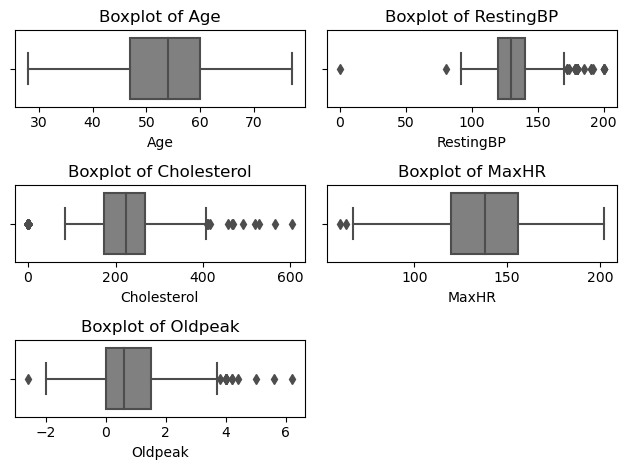

In [12]:
num_plots = len(non_categorical_columns)
num_cols = 2
num_rows = -(-num_plots // num_cols)  

# Créer une grille de sous-tracés
fig, axes = plt.subplots(num_rows, num_cols)

# Boucle à travers les colonnes non catégorielles et visualisation
for i, column in enumerate(non_categorical_columns):
    row = i // num_cols
    col = i % num_cols
    if num_rows > 1:
        ax = axes[row, col]
    else:
        ax = axes[col]
    # Visualisation de la boîte à moustaches pour chaque variable numérique
    sns.boxplot(data=df, x=column, ax=ax, color='gray')
    ax.set_title(f"Boxplot of {column}")
    ax.set_xlabel(column)

# Supprimer les tracés vides s'il y en a
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col] if num_rows > 1 else axes[col])

plt.tight_layout()
plt.show()


### Check disribution

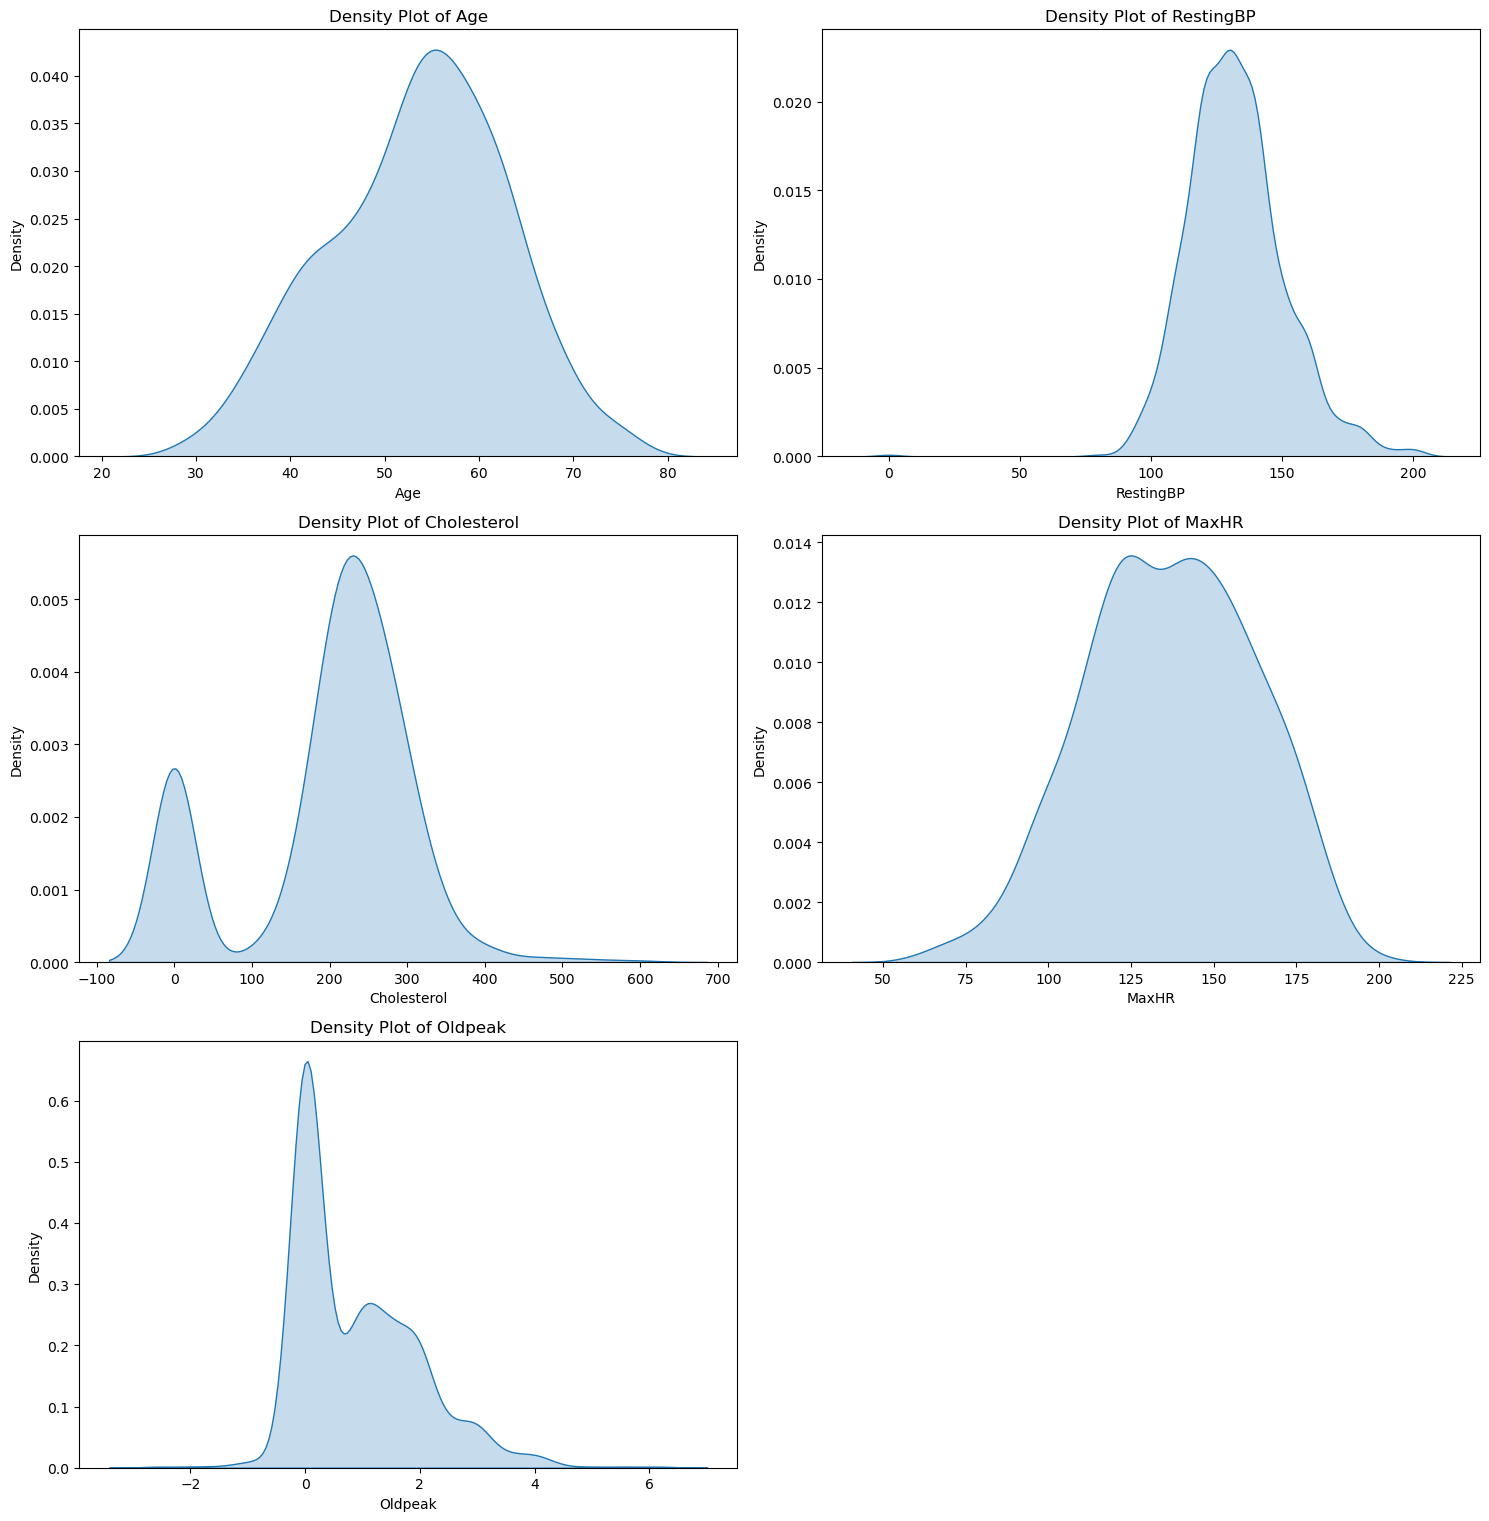

In [13]:
# Créer une grille de sous-tracés
fig, axes = plt.subplots(num_plots, 2, figsize=(15, 5*num_plots))

# Boucle à travers les colonnes non catégorielles et visualisation des courbes de densité
for i, col in enumerate(non_categorical_columns):
    row_idx = i // 2
    col_idx = i % 2
    sns.kdeplot(data=df, x=col, ax=axes[row_idx, col_idx], fill=True)
    axes[row_idx, col_idx].set_title(f"Density Plot of {col}")
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel("Density")

# Supprimer les sous-tracés qui ne sont pas utilisés
for i in range(num_plots):
    for j in range(2):
        if i * 2 + j >= len(non_categorical_columns):
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()


categorical_columns


Counts for Sex column:
M    725
F    193
Name: Sex, dtype: int64

Counts for ChestPainType column:
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

Counts for RestingECG column:
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

Counts for ExerciseAngina column:
N    547
Y    371
Name: ExerciseAngina, dtype: int64

Counts for ST_Slope column:
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


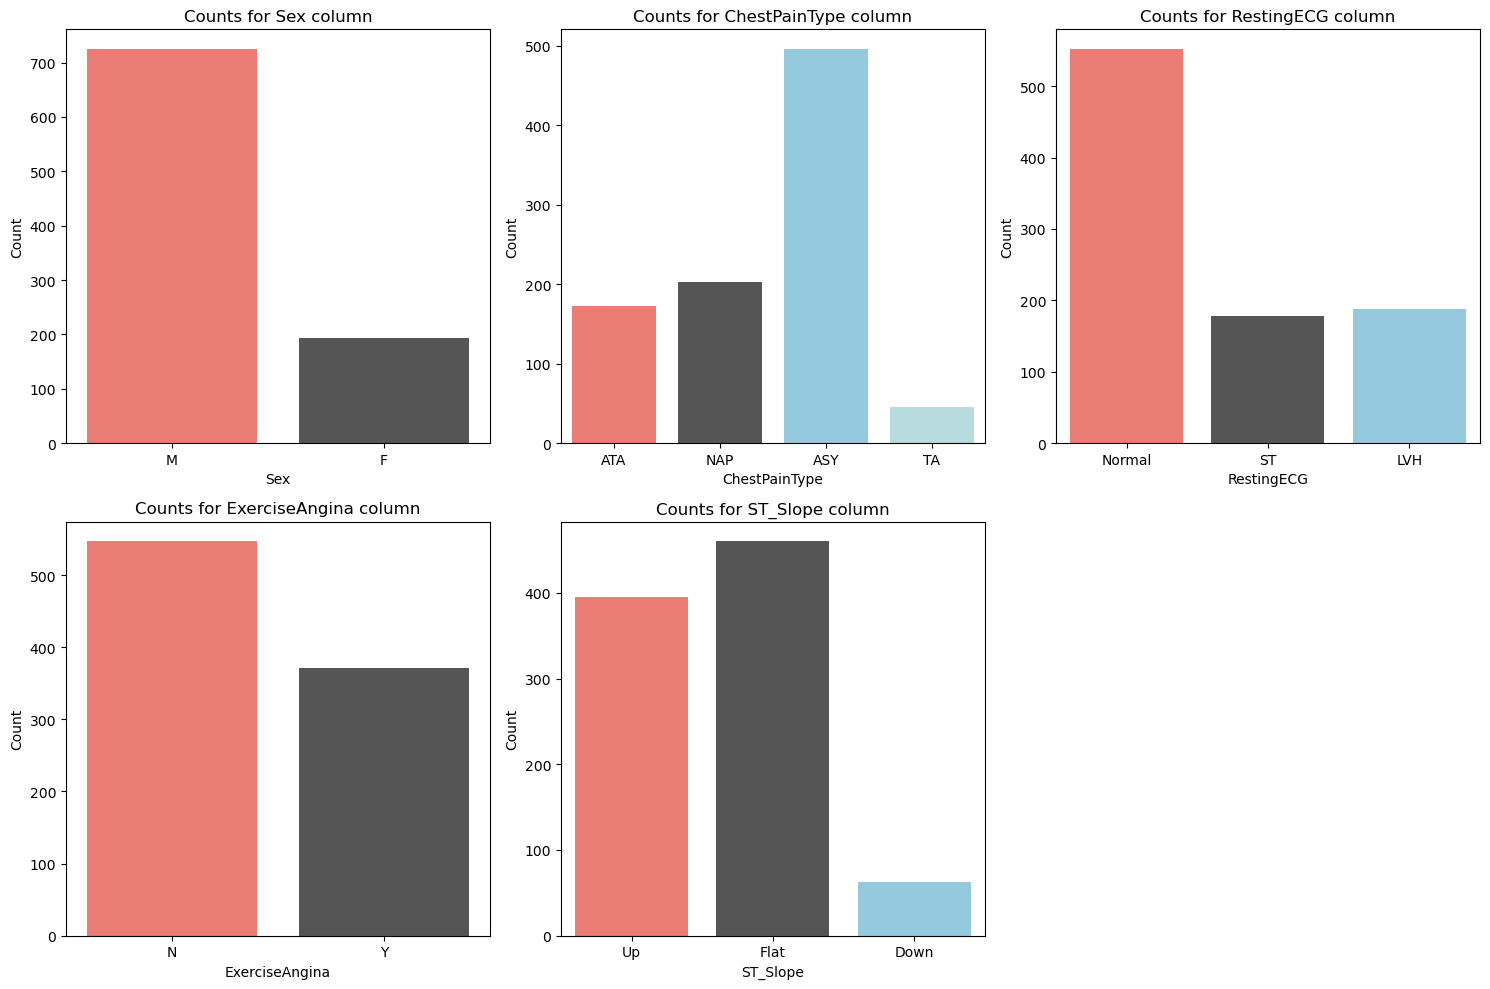

In [14]:
categorical_columns= ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
custom_colors = ['#FF6961', '#555555', '#87CEEB', '#B0E0E6']
# Créer une grille de sous-tracés
num_plots = len(categorical_columns)
num_cols = 3  # Nombre de colonnes dans la grille
num_rows = -(-num_plots // num_cols)  # Calculer le nombre de lignes nécessaire
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Boucle à travers les colonnes catégorielles et visualisation
for i, column in enumerate(categorical_columns):
    print(f"\nCounts for {column} column:")
    print(df[column].value_counts())
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.countplot(data=df, x=column, palette=custom_colors, ax=ax)
    ax.set_title(f"Counts for {column} column")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")

# Supprimer les tracés vides s'il y en a
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col] if num_rows > 1 else axes[col])

plt.tight_layout()
plt.show()


## Data Cleaning

In [15]:
# Supprimer les observations avec une pression artérielle au repos égale à 0
df = df[df['RestingBP'] != 0]
# Identifier les indices des observations avec une concentration de cholestérol égale à 0
indices_chol_zero = df[df['Cholesterol'] == 0].index
# Supprimer les observations avec une concentration de cholestérol égale à 0
df.drop(labels=indices_chol_zero, inplace=True)
# Identifier les observations avec une concentration de cholestérol aberrante
valeurs_aberrantes_cholesterol = df[df['Cholesterol'] >= 400]
# Supprimer les observations avec une concentration de cholestérol aberrante
df = df[df['Cholesterol'] < 400]

C:\Users\user\AppData\Local\Temp\ipykernel_7388\120306111.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels=indices_chol_zero, inplace=True)


In [16]:
df.shape

(733, 12)

### Bivariate Analysis

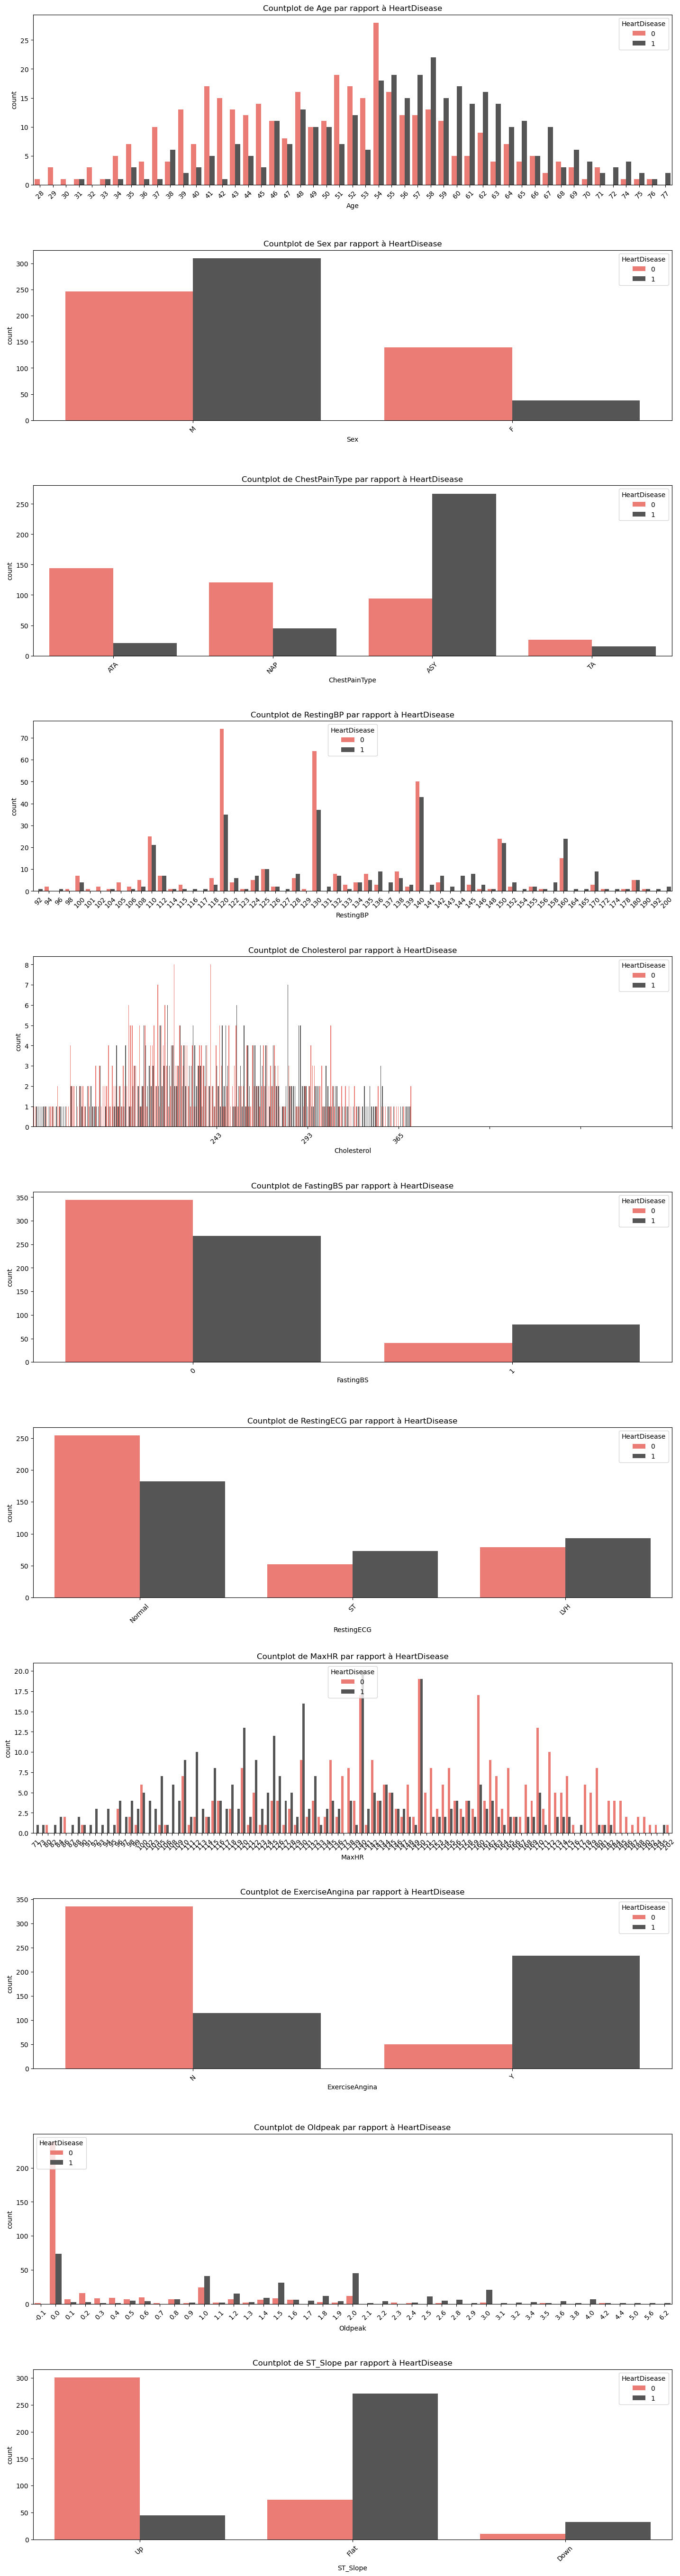

In [17]:
# Liste des colonnes dans le DataFrame
colonnes = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
            'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

# Configuration du nombre de lignes pour les sous-graphiques
num_lignes = len(colonnes)
fig, axes = plt.subplots(num_lignes, 1, figsize=(15, 5*num_lignes))

# Boucle pour chaque colonne et visualisation bivariée
for i, colonne in enumerate(colonnes):
    ax = plt.subplot(num_lignes, 1, i+1)
    sns.countplot(x=colonne, hue='HeartDisease', palette=custom_colors, data=df, ax=ax)
    plt.title(f'Countplot de {colonne} par rapport à HeartDisease')
    plt.xticks(rotation=45)  
    
    # Ajuster l'échelle de l'axe des abscisses pour la variable Cholesterol
    if colonne == 'Cholesterol':
        ax.set_xticks(range(100, df['Cholesterol'].max(), 50))  # Ajuster les intervalles des ticks
    
plt.tight_layout(pad=3.0)  
plt.show()


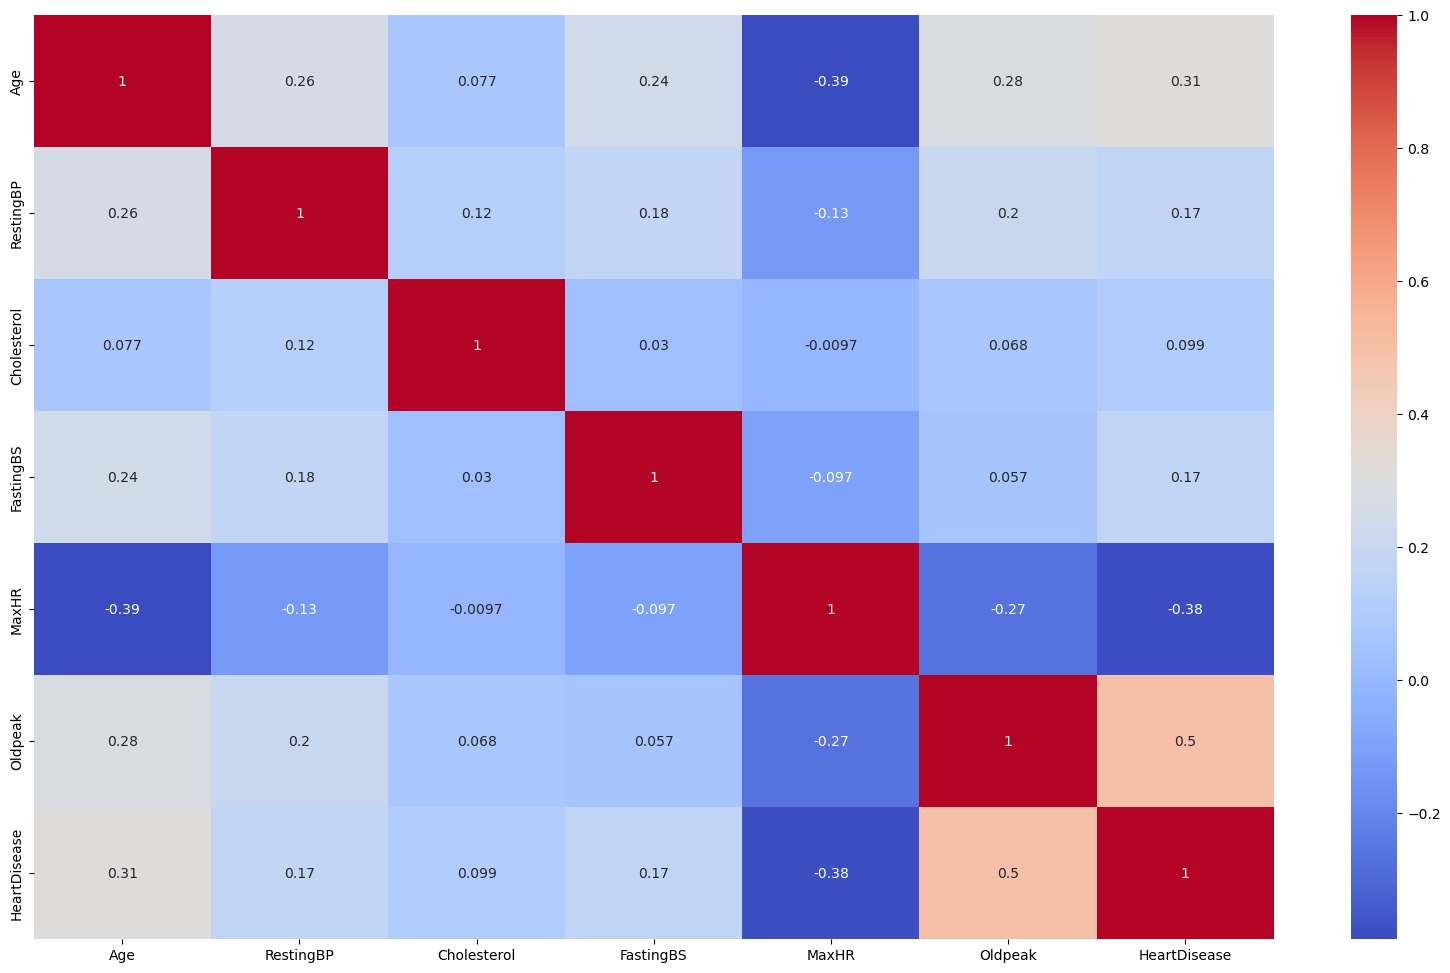

In [18]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Encoding data

In [19]:
LabelEncoderModel = LabelEncoder()
df['Sex'] = LabelEncoderModel.fit_transform(df['Sex'])
df['ChestPainType'] = LabelEncoderModel.fit_transform(df['ChestPainType'])
df['RestingECG'] = LabelEncoderModel.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = LabelEncoderModel.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = LabelEncoderModel.fit_transform(df['ST_Slope'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             733 non-null    int64  
 1   Sex             733 non-null    int32  
 2   ChestPainType   733 non-null    int32  
 3   RestingBP       733 non-null    int64  
 4   Cholesterol     733 non-null    int64  
 5   FastingBS       733 non-null    int64  
 6   RestingECG      733 non-null    int32  
 7   MaxHR           733 non-null    int64  
 8   ExerciseAngina  733 non-null    int32  
 9   Oldpeak         733 non-null    float64
 10  ST_Slope        733 non-null    int32  
 11  HeartDisease    733 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 60.1 KB


## Splitting data,Scaling data,and importing machine learning models

In [20]:
from IPython.display import display

# Séparation des données
X = df.iloc[:, :-1]  # Caractéristiques
y = df.iloc[:, -1]   # Variable cible

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Définition des modèles
models = {
    "Régression Logistique": LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000),
    "SVC": SVC(C=0.5, kernel='rbf'),
    "Naive Bayes": GaussianNB(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Forêt Aléatoire": RandomForestClassifier(n_estimators=10, criterion='entropy'),
    "K-NN": KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski'),
    "XGBoost": GradientBoostingClassifier()
}

best_accuracy = 0
best_model_name = ""
print('*******************************************************')
# Entraînement et évaluation des modèles
for name, model in models.items():
    model.fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    print(f"{name} - Score d'entraînement : {score_train:.4f}, Score de test : {score_test:.4f}")

    preds = model.predict(X_test)
    print(classification_report(y_test, preds))
    print('*******************************************************')
    if score_test > best_accuracy:
        best_accuracy = score_test
        best_model_name = name
        best_model = model

*******************************************************
Régression Logistique - Score d'entraînement : 0.8567, Score de test : 0.8571
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        78
           1       0.84      0.86      0.85        69

    accuracy                           0.86       147
   macro avg       0.86      0.86      0.86       147
weighted avg       0.86      0.86      0.86       147

*******************************************************
SVC - Score d'entraînement : 0.8874, Score de test : 0.8503
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        78
           1       0.83      0.86      0.84        69

    accuracy                           0.85       147
   macro avg       0.85      0.85      0.85       147
weighted avg       0.85      0.85      0.85       147

*******************************************************
Naive Bayes - Score d'entraînement : 0.8

### Review
  Based on the evaluation of all models, the Random Forest model achieved the highest accuracy of 86%. Therefore, we will leverage this model to predict on the  test data.

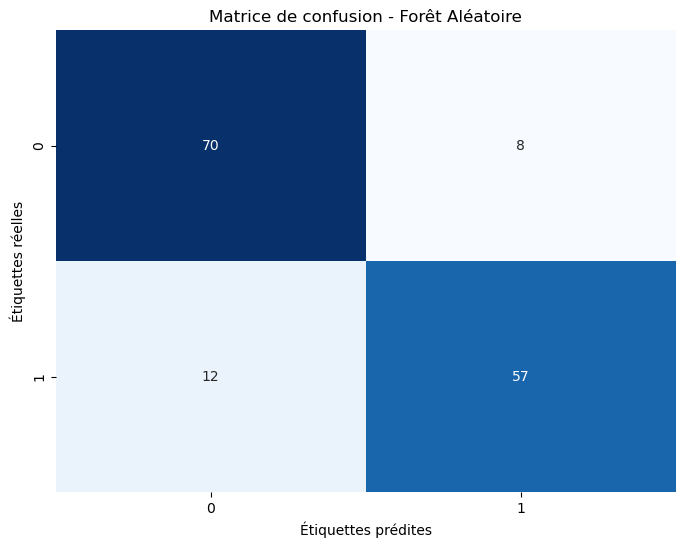

In [22]:
from sklearn.metrics import confusion_matrix
# Affichage de la matrice de confusion pour le modèle avec la meilleure précision
preds = best_model.predict(X_test)
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Étiquettes prédites')
plt.ylabel('Étiquettes réelles')
plt.title(f'Matrice de confusion - {best_model_name}')
plt.show()